### **Process**

1. Data **Collection**
2. Data **Cleaning**
3. Data **Analysis**

---

### **Potential Questions**

1. What are **internet usage trends over time** for select countries ?
2. Which countries have been **growing the fastest per year** ?
3. Which countries have been **growing the slowest per year** ?
4. Do any countries have an **abnormal high internet usage compared to their number of servers** ?

---

In [33]:
import pandas as pd
import janitor
df=pd.read_csv(".\\data\\worldbank-country-internet-data.csv")

df.head()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,AFG,Individuals using the Internet (% of population),IT.NET.USER.ZS,..,..,..,..,..,..,...,7,8.26,11,13.5,16.8,17.6,18.4,..,..,..
1,Afghanistan,AFG,"Individuals using the Internet, female (% of f...",IT.NET.USER.FE.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,Afghanistan,AFG,"Individuals using the Internet, male (% of mal...",IT.NET.USER.MA.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,Afghanistan,AFG,Secure Internet servers,IT.NET.SECR,..,..,..,..,..,..,...,57,74,426,1577,1965,1047,1362,1565,1491,1814
4,Afghanistan,AFG,Secure Internet servers (per 1 million people),IT.NET.SECR.P6,..,..,..,..,..,..,...,1.7382011137112,2.18729357416894,12.2764405423167,44.1873650754779,53.4795175761047,27.6573503133086,34.861417801576,39.1245970166507,36.7432860701151,43.758544404586


In [34]:
df.columns = [col[:4] if(col.count("YR")>0) else col[:] for col in df.columns]

In [35]:
df.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code', '1960',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [36]:
df=df.clean_names()
df.columns

Index(['country_name', 'country_code', 'series_name', 'series_code', '1960',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [37]:
df.head()

,country_name,country_code,series_name,series_code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,Individuals using the Internet (% of population),IT.NET.USER.ZS,..,..,..,..,..,..,...,7,8.26,11,13.5,16.8,17.6,18.4,..,..,..
1,Afghanistan,AFG,"Individuals using the Internet, female (% of f...",IT.NET.USER.FE.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,Afghanistan,AFG,"Individuals using the Internet, male (% of mal...",IT.NET.USER.MA.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,Afghanistan,AFG,Secure Internet servers,IT.NET.SECR,..,..,..,..,..,..,...,57,74,426,1577,1965,1047,1362,1565,1491,1814
4,Afghanistan,AFG,Secure Internet servers (per 1 million people),IT.NET.SECR.P6,..,..,..,..,..,..,...,1.7382011137112,2.18729357416894,12.2764405423167,44.1873650754779,53.4795175761047,27.6573503133086,34.861417801576,39.1245970166507,36.7432860701151,43.758544404586


In [41]:
selected_columns=["country_name","country_code","series_name","series_code"]
year_columns=[str(year) for year in range(1990,2024)]

new_df=df[selected_columns+year_columns]

In [42]:
new_df.head()

,country_name,country_code,series_name,series_code,1990,1991,1992,1993,1994,1995,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,Individuals using the Internet (% of population),IT.NET.USER.ZS,0,0,0,0,0,0,...,7,8.26,11,13.5,16.8,17.6,18.4,..,..,..
1,Afghanistan,AFG,"Individuals using the Internet, female (% of f...",IT.NET.USER.FE.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,Afghanistan,AFG,"Individuals using the Internet, male (% of mal...",IT.NET.USER.MA.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,Afghanistan,AFG,Secure Internet servers,IT.NET.SECR,..,..,..,..,..,..,...,57,74,426,1577,1965,1047,1362,1565,1491,1814
4,Afghanistan,AFG,Secure Internet servers (per 1 million people),IT.NET.SECR.P6,..,..,..,..,..,..,...,1.7382011137112,2.18729357416894,12.2764405423167,44.1873650754779,53.4795175761047,27.6573503133086,34.861417801576,39.1245970166507,36.7432860701151,43.758544404586


In [43]:
new_df.to_csv(".\\data\\cleaned_data.csv",index=False)

In [44]:
df.head()

,country_name,country_code,series_name,series_code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,Individuals using the Internet (% of population),IT.NET.USER.ZS,..,..,..,..,..,..,...,7,8.26,11,13.5,16.8,17.6,18.4,..,..,..
1,Afghanistan,AFG,"Individuals using the Internet, female (% of f...",IT.NET.USER.FE.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,Afghanistan,AFG,"Individuals using the Internet, male (% of mal...",IT.NET.USER.MA.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,Afghanistan,AFG,Secure Internet servers,IT.NET.SECR,..,..,..,..,..,..,...,57,74,426,1577,1965,1047,1362,1565,1491,1814
4,Afghanistan,AFG,Secure Internet servers (per 1 million people),IT.NET.SECR.P6,..,..,..,..,..,..,...,1.7382011137112,2.18729357416894,12.2764405423167,44.1873650754779,53.4795175761047,27.6573503133086,34.861417801576,39.1245970166507,36.7432860701151,43.758544404586


In [45]:
df=pd.read_csv(".\\data\\cleaned_data.csv")
df.head()

,country_name,country_code,series_name,series_code,1990,1991,1992,1993,1994,1995,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,Individuals using the Internet (% of population),IT.NET.USER.ZS,0,0,0,0,0,0,...,7,8.26,11,13.5,16.8,17.6,18.4,..,..,..
1,Afghanistan,AFG,"Individuals using the Internet, female (% of f...",IT.NET.USER.FE.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,Afghanistan,AFG,"Individuals using the Internet, male (% of mal...",IT.NET.USER.MA.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,Afghanistan,AFG,Secure Internet servers,IT.NET.SECR,..,..,..,..,..,..,...,57,74,426,1577,1965,1047,1362,1565,1491,1814
4,Afghanistan,AFG,Secure Internet servers (per 1 million people),IT.NET.SECR.P6,..,..,..,..,..,..,...,1.7382011137112,2.18729357416894,12.2764405423167,44.1873650754779,53.4795175761047,27.6573503133086,34.861417801576,39.1245970166507,36.7432860701151,43.758544404586


In [57]:
selected_countries=["Greenland","Iceland","Turkiye"]
country_df=df[df["country_name"] .isin(selected_countries)]

In [58]:
country_df.head()

,country_name,country_code,series_name,series_code,1990,1991,1992,1993,1994,1995,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
385,Greenland,GRL,Individuals using the Internet (% of population),IT.NET.USER.ZS,0,0,0,0,0.064712121,0.053940342,...,66.7,67.6004,68.5009,69.4825,..,..,..,..,..,..
386,Greenland,GRL,"Individuals using the Internet, female (% of f...",IT.NET.USER.FE.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
387,Greenland,GRL,"Individuals using the Internet, male (% of mal...",IT.NET.USER.MA.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
388,Greenland,GRL,Secure Internet servers,IT.NET.SECR,..,..,..,..,..,..,...,131,157,166,142,172,180,232,248,261,271
389,Greenland,GRL,Secure Internet servers (per 1 million people),IT.NET.SECR.P6,..,..,..,..,..,..,...,2327.02726707523,2797.87575293153,2954.472644431,2527.94986826177,3070.16760973172,3201.42285460204,4115.88340695797,4377.52634458899,4606.3429872399,4765.67308537765


In [71]:
cdf=country_df[country_df["series_code"]=="IT.NET.USER.ZS"]
cdf.head()

,country_name,country_code,series_name,series_code,1990,1991,1992,1993,1994,1995,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
385,Greenland,GRL,Individuals using the Internet (% of population),IT.NET.USER.ZS,0,0,0,0,0.064712121,0.053940342,...,66.7,67.6004,68.5009,69.4825,..,..,..,..,..,..
440,Iceland,ISL,Individuals using the Internet (% of population),IT.NET.USER.ZS,0,0.505129002,1.53916008,2.667825265,6.794811784,11.2158757,...,98.158,98.2,98.24,98.2552,99.011,99.5049,99.5328,99.687,99.8565,..
990,Turkiye,TUR,Individuals using the Internet (% of population),IT.NET.USER.ZS,0,0,0,0.008457732,0.049869182,0.081691205,...,51.0374,53.745,58.3477,64.6846,71.0428,73.9767,77.6696,81.4084,83.4372,85.9607


In [72]:
cdf.drop(columns=["country_code","series_name","series_code"],inplace=True)
cdf.head()

C:\Users\agarw\AppData\Local\Temp\ipykernel_26616\2828965102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.drop(columns=["country_code","series_name","series_code"],inplace=True)


,country_name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
385,Greenland,0,0,0,0,0.064712121,0.053940342,1.796719191,7.954504682,14.65444717,...,66.7,67.6004,68.5009,69.4825,..,..,..,..,..,..
440,Iceland,0,0.505129002,1.53916008,2.667825265,6.794811784,11.2158757,14.80647932,27.47886875,36.2642065,...,98.158,98.2,98.24,98.2552,99.011,99.5049,99.5328,99.687,99.8565,..
990,Turkiye,0,0,0,0.008457732,0.049869182,0.081691205,0.192724936,0.473695432,0.698805129,...,51.0374,53.745,58.3477,64.6846,71.0428,73.9767,77.6696,81.4084,83.4372,85.9607


In [73]:
cdf.set_index("country_name",inplace=True)

In [74]:
cdf.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
country_name,,,,,,,,,,,,,,,,,,,,,
Greenland,0,0,0,0,0.064712121,0.053940342,1.796719191,7.954504682,14.65444717,21.60261331,...,66.7,67.6004,68.5009,69.4825,..,..,..,..,..,..
Iceland,0,0.505129002,1.53916008,2.667825265,6.794811784,11.2158757,14.80647932,27.47886875,36.2642065,41.29456671,...,98.158,98.2,98.24,98.2552,99.011,99.5049,99.5328,99.687,99.8565,..
Turkiye,0,0,0,0.008457732,0.049869182,0.081691205,0.192724936,0.473695432,0.698805129,2.292117685,...,51.0374,53.745,58.3477,64.6846,71.0428,73.9767,77.6696,81.4084,83.4372,85.9607


In [76]:
final_cdf=cdf.T

final_cdf.head()

country_name,Greenland,Iceland,Turkiye
1990,0,0,0
1991,0,0.505129002,0
1992,0,1.53916008,0
1993,0,2.667825265,0.008457732
1994,0.064712121,6.794811784,0.049869182


In [80]:
final_cdf.to_csv(".\\data\\selected_countries_internetusage_over_time.csv")

In [94]:
df=pd.read_csv(".\\data\\selected_countries_internetusage_over_time.csv")
df.head()

,Unnamed: 0,Greenland,Iceland,Turkiye
0,1990,0,0,0.000000
1,1991,0,0.505129002,0.000000
2,1992,0,1.53916008,0.000000
3,1993,0,2.667825265,0.008458
4,1994,0.064712121,6.794811784,0.049869


In [95]:
df.rename(columns={'Unnamed: 0': "Year"}, inplace=True)

In [85]:
df.set_index("Year",inplace=True)

KeyError: "None of ['Year'] are in the columns"

In [108]:
# df.head()
# df.info()
# df["Greenland"]=pd.to_numeric(df["Greenland"])
df.loc[df["Greenland"]=="..","Greenland"]=0

In [109]:
df["Greenland"]=pd.to_numeric(df["Greenland"])

In [112]:
df.info()
df.loc[df["Iceland"]=="..","Iceland"]=0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       34 non-null     int64  
 1   Greenland  34 non-null     float64
 2   Iceland    34 non-null     object 
 3   Turkiye    34 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ KB


In [118]:
df["Iceland"]=pd.to_numeric(df["Iceland"])

<Axes: xlabel='Year'>

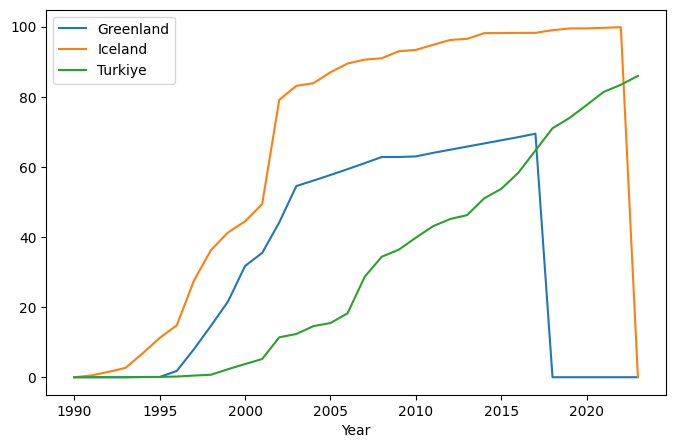

In [123]:
df.plot(x="Year",y=["Greenland","Iceland","Turkiye"],figsize=(8, 5))
# df.info()